# Fully Connected Layer


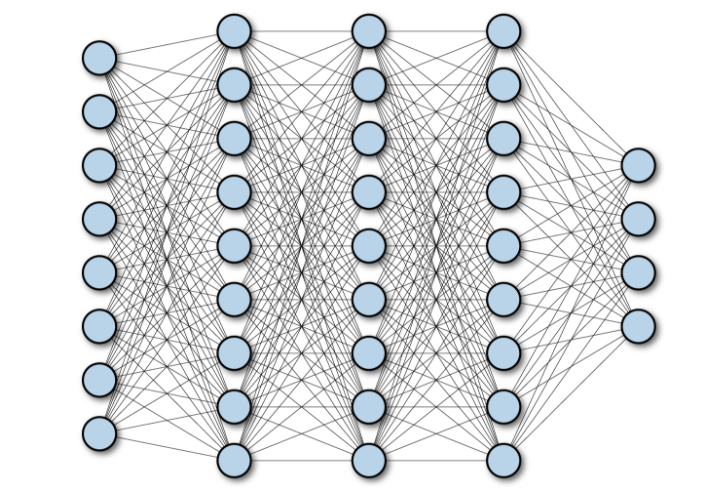

 - Não leva em conta a organização espacial dos dados - achata a imagem em um vetor por exemplo

 - Muitos parâmetros a cada  camada - #input x #output + #output

Redes convolucionais costumam apresentar desempenho superior em imagens, pois levam em conta a vizinhança de cada pixel no seu processamento e o compartilhamento de parâmetros por diferentes pixels possibilita que redes com um maior número de camadas sejam treinadas.

## Mas o que é uma convolução?

A convolução é um operador que realiza a combinação linear de duas funções resultando em um único número. Como estamos manipulando sinais digitais (imagens e áudios por exemplo), temos amostras discretas das funções. 

OBS: Como dito na aula, o que usaremos de fato é a correlação cruzada, então quando falo convolução aqui, é um abuso de terminologia


Usualmente em deep learning, o tamanho da janela de convolução é menor que o da entrada e então o que se faz é centrar essa janela em diferentes pontos da entrada e assim produzir uma nova entrada. Por essa razão, muitas vezes falamos de um filtro deslizante. 

## Começando do básico: Convolução em 1 Dimensão

Para entendermos a convolução bem, vamos começar com o caso simples de uma dimensão. Imagine que temos uma função $ f(t) $ onde $ t $ age como índice de nossos valores. Um sinal sonoro, por exemplo é facilmente descrito dessa maneira. Assim temos um kernel $ g(t) $ também função discreta. Podemos descrever a convolução centrada em um índice $ x $ como:

$$
(f*g)(x) = \Sigma_{t = -\infty}^{\infty} f(x+t)g(t)
$$

Vamos ver desenhando:

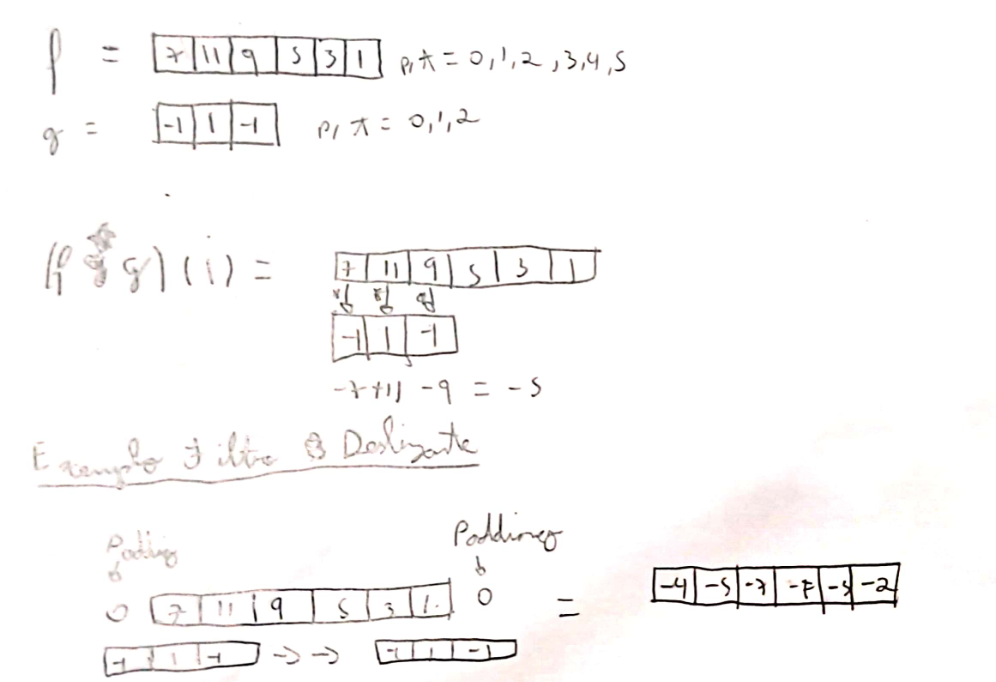

## Convolução em 2 dimensões

Tendo entendido a conlução em 1 dimensão, podemos facilmente abstrair para duas dimensões, onde nossa entrada $ f $ agora é uma matrix e nosso kernel $ g $ também.

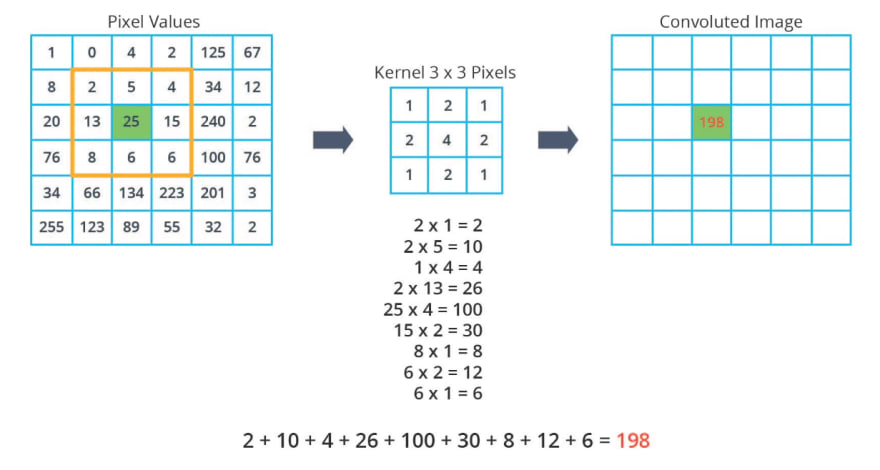

No contexto de processamento de imagens clássica, essa operação é muitas vezes chamada de filtragem, pois o kernel "busca" uma característica na imagem. Anteriormente a era do Deep Learning, estes filtros eram escritos à mão com diferentes propósitos.

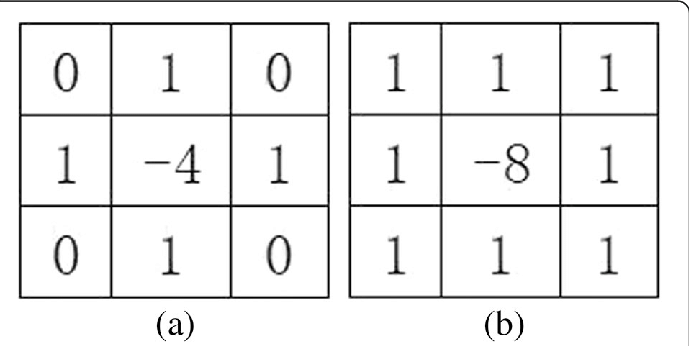

Acima está um exemplo de filtro laplaciano, usado para buscar contornos em imagens.

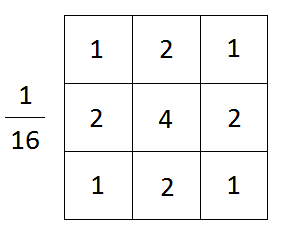

Filtro Gaussiano, usado para suavizar imagens com grande quantidade de resíduo.

## Demo com Código Utilizando Filtros 

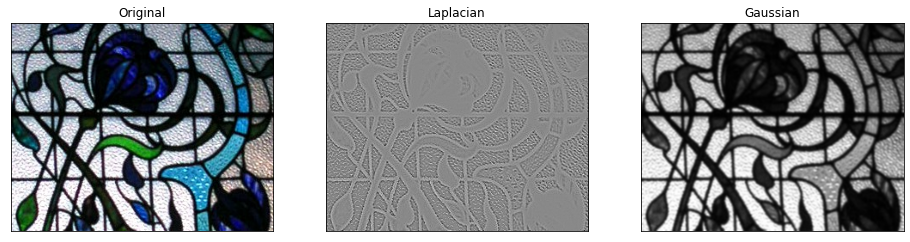

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# carregando a imagem
img0 = cv2.imread('vitral.jpg',)

# convertendo para grayscale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# aplicando filtro gaussiano que suaviza ruído
gauss = cv2.GaussianBlur(gray,(3,3),0)

# utilizando filtro laplaciana para detectar bordas
laplacian = cv2.Laplacian(gray,cv2.CV_64F)


plt.figure(figsize=(16,8))


plt.subplot(1,3,1),plt.imshow(img0,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(gauss,cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])

plt.show()

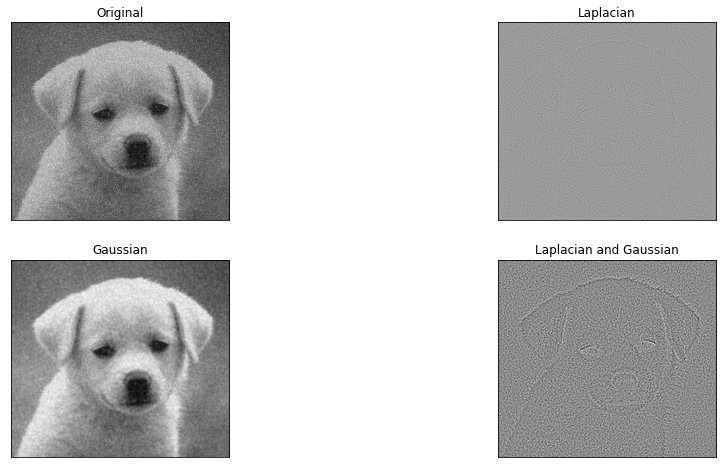

In [ ]:
img1 = cv2.imread('dog.png',)


gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


gauss = cv2.GaussianBlur(gray,(3,3),0)


laplacian = cv2.Laplacian(gray,cv2.CV_64F)

laplacian_gauss =  cv2.Laplacian(gauss,cv2.CV_64F)


plt.figure(figsize=(16,8))


plt.subplot(2,2,1),plt.imshow(img1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(gauss,cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])


plt.subplot(2,2,4),plt.imshow(laplacian_gauss,cmap = 'gray')
plt.title('Laplacian and Gaussian'), plt.xticks([]), plt.yticks([])

plt.show()

## Convolução em profundidade

A última etapa para entender o bloco básico das CNNs é entender a convolução em profundidade. Uma imgem colorida RGB, possui 3 canais, sendo portanto uma matriz 3D, assim o filtro de convolução também deve ter 3 canais, de maneira a colapsar a imagem em uma matriz 2D. 

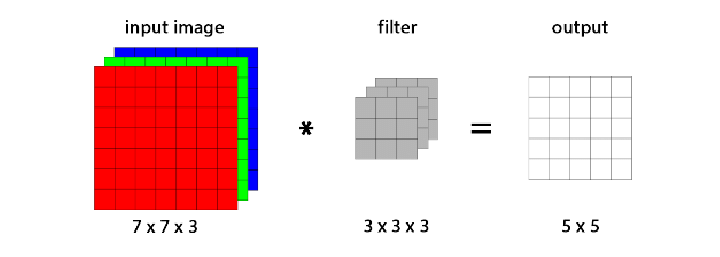